<a href="https://colab.research.google.com/github/TayyebaSadaq/Data-Mining-and-Decision-Tree-Algorithms/blob/main/100611584_Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

I. Importing Libraries:

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy as sp



II. Load and Inspect Data:
access to folder with the dataset - https://drive.google.com/drive/folders/1JHEfJ3hbV7NqxZcx1NEst-92n8q6lHkm?usp=drive_link

In [11]:
from google.colab import drive
drive.mount('/content/drive')

# Load the file from the mounted drive
data = pd.read_csv('/content/drive/MyDrive/SharedData/diabetes.csv')  # Adjust the path to match your folder

# Inspect the first few rows of the data
data.head()

# General information about the dataset
data.info()

# Descriptive statistics for numerical columns
data.describe()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


III. Check for Missing and Zero Values

In [12]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Check for zero values in the dataset
print((data == 0).sum())


Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Id                             0
Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64


IV. Identifying Categorical and Numerical Columns

In [13]:
# Identify categorical and numerical columns
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
print("Categorical Columns:", categorical_columns)

numerical_columns = [col for col in data.columns if data[col].dtype != 'object']
print("Numerical Columns:", numerical_columns)


Categorical Columns: []
Numerical Columns: ['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


V. Checking for Outliers and Missing values, handling them and producing visualisation after each step to see how data distribution changes

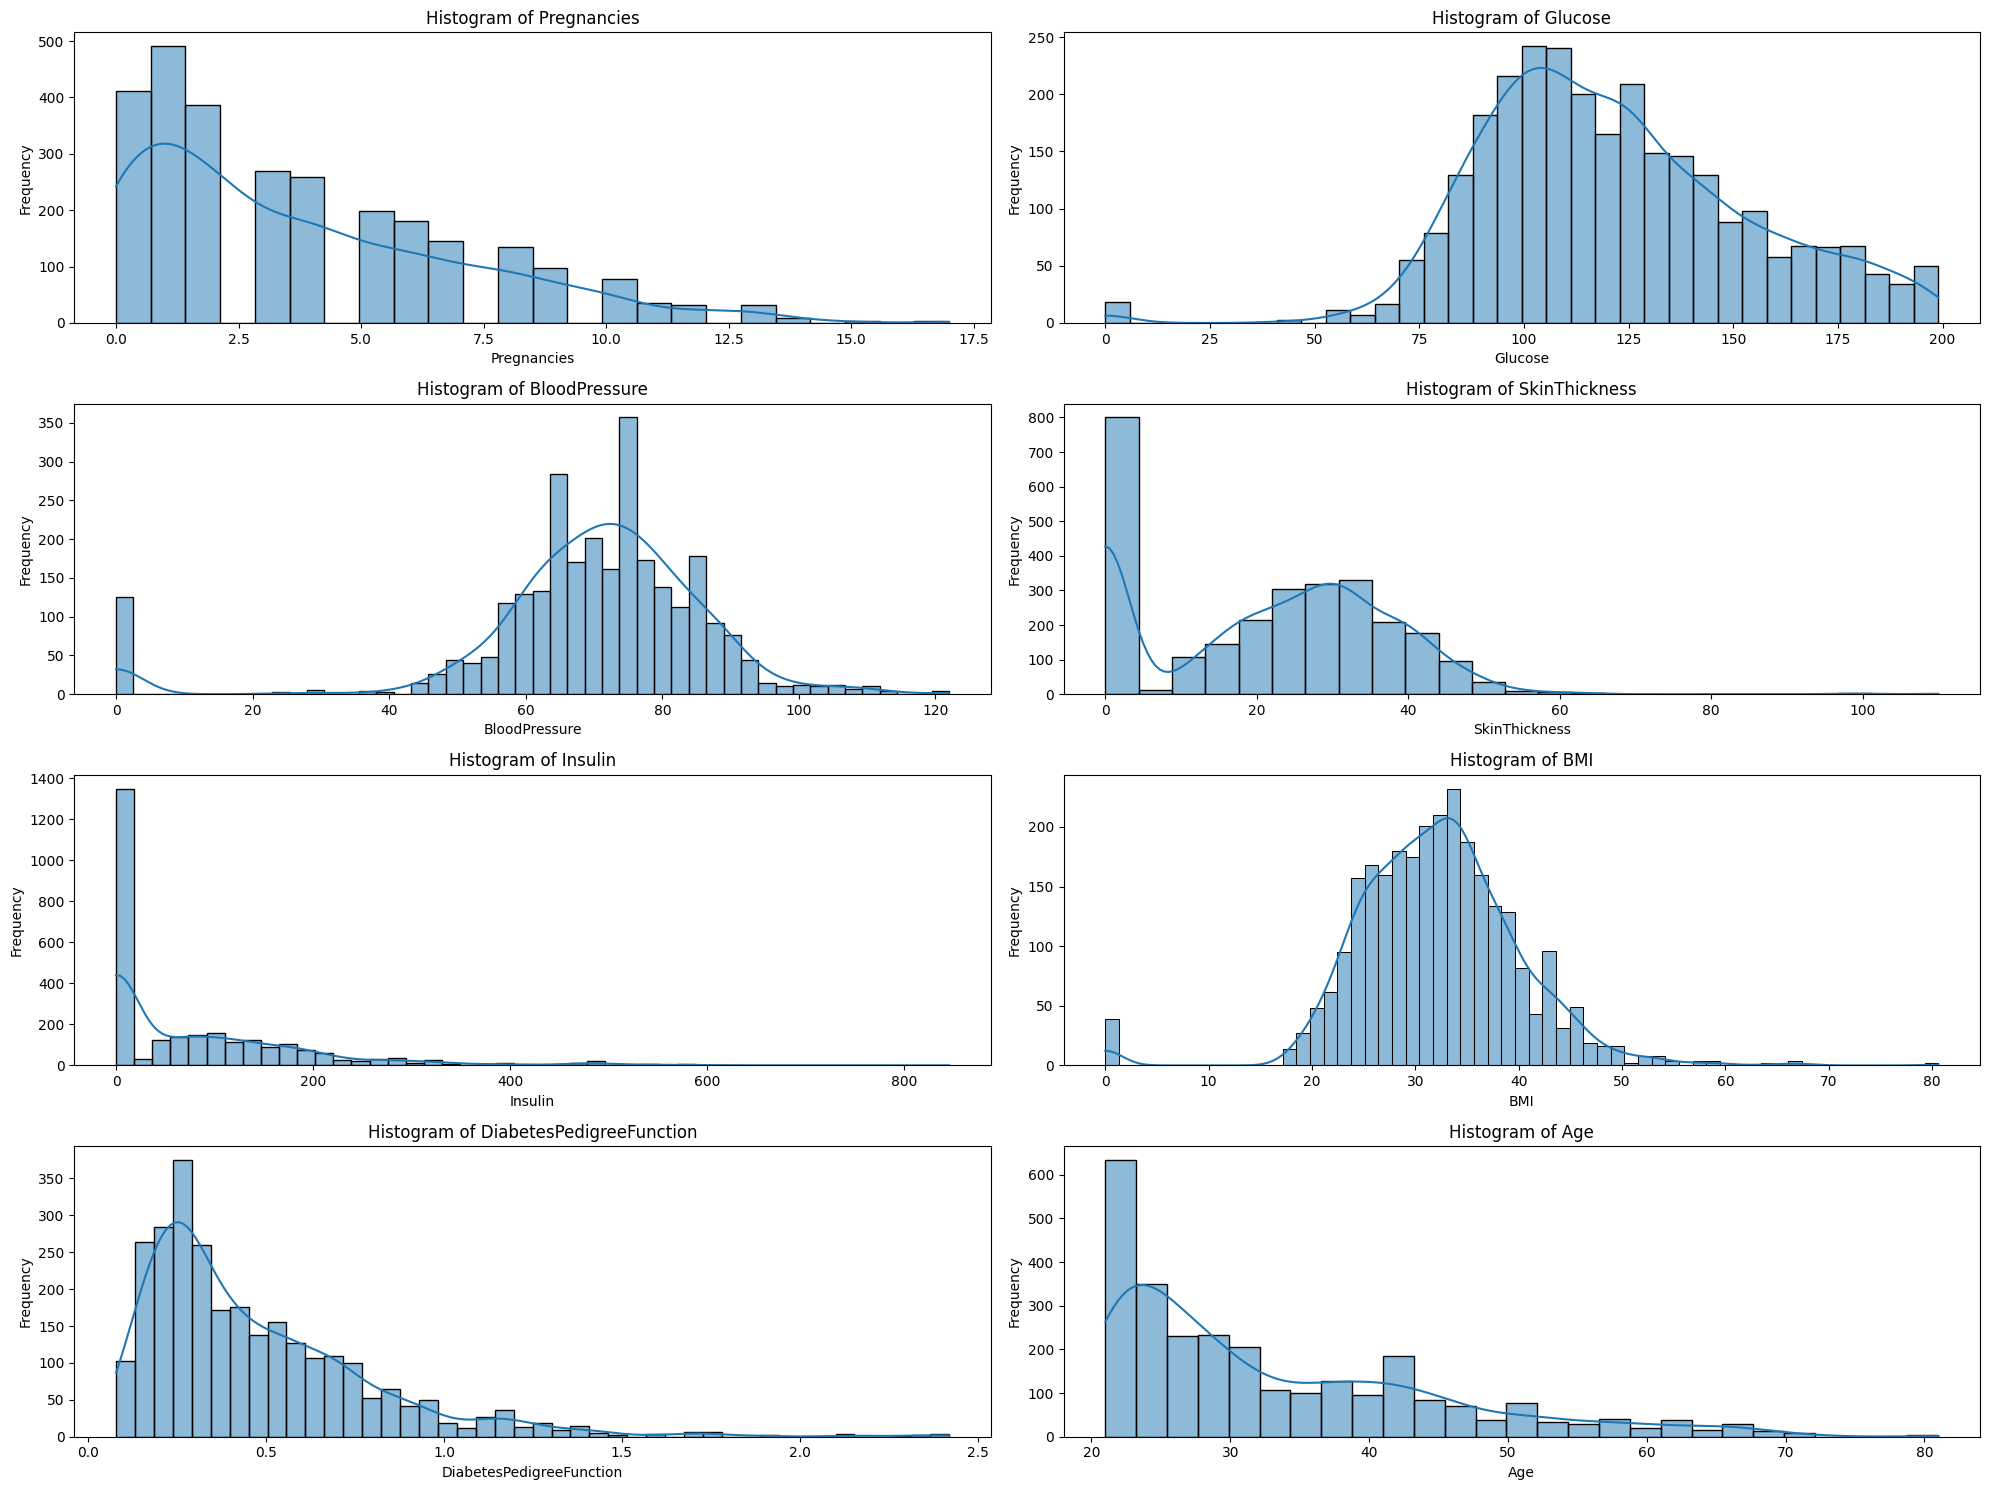

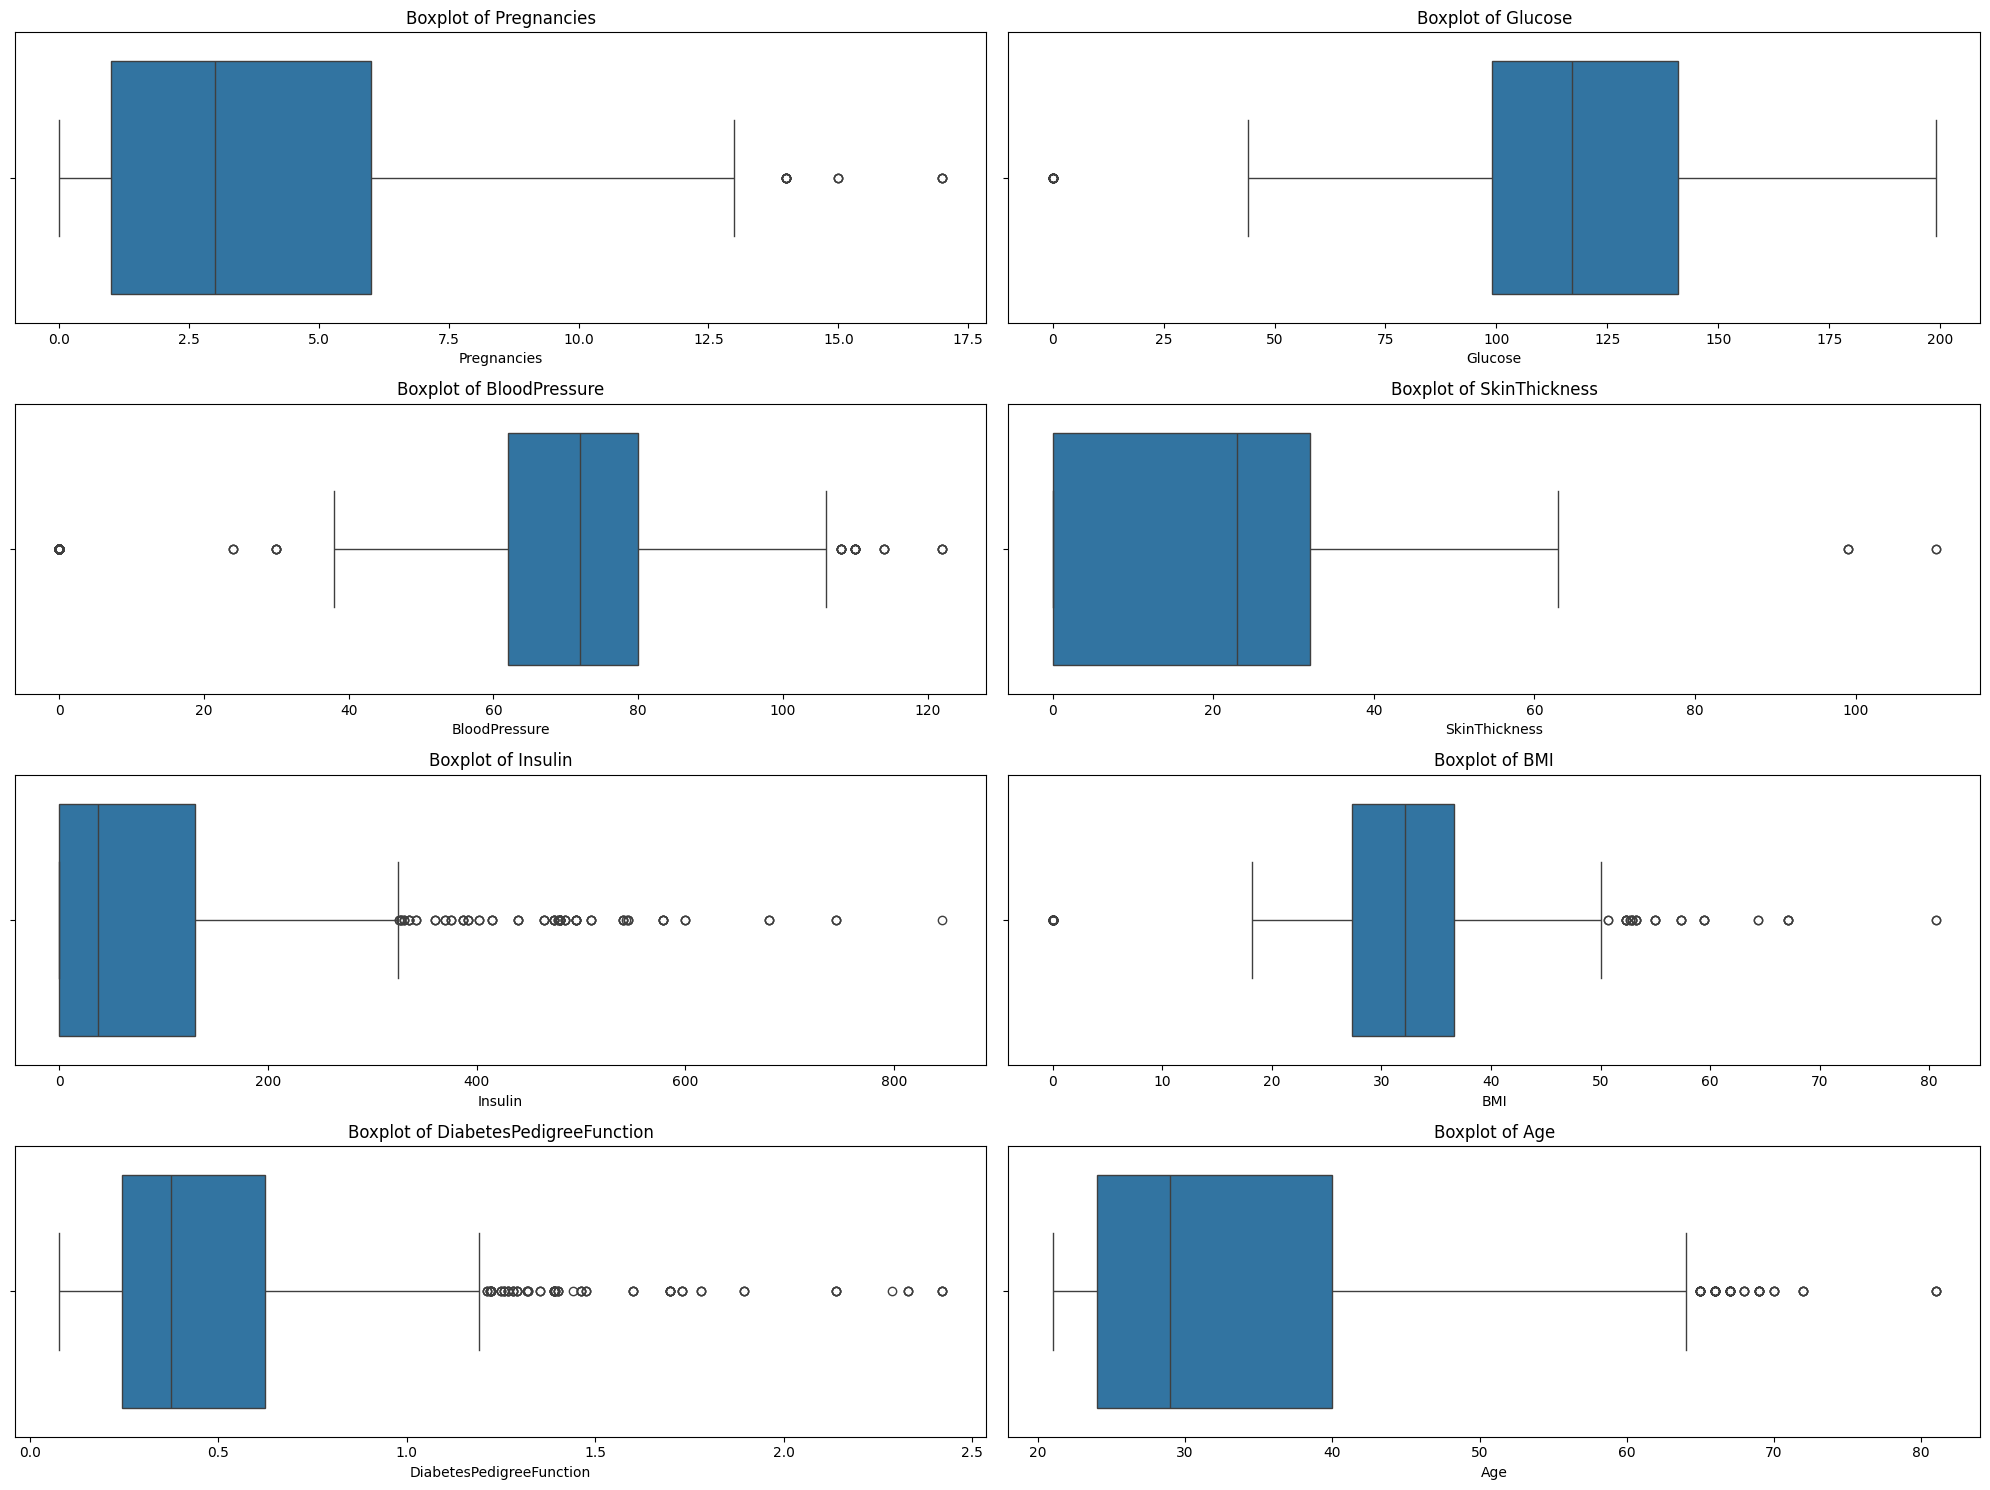

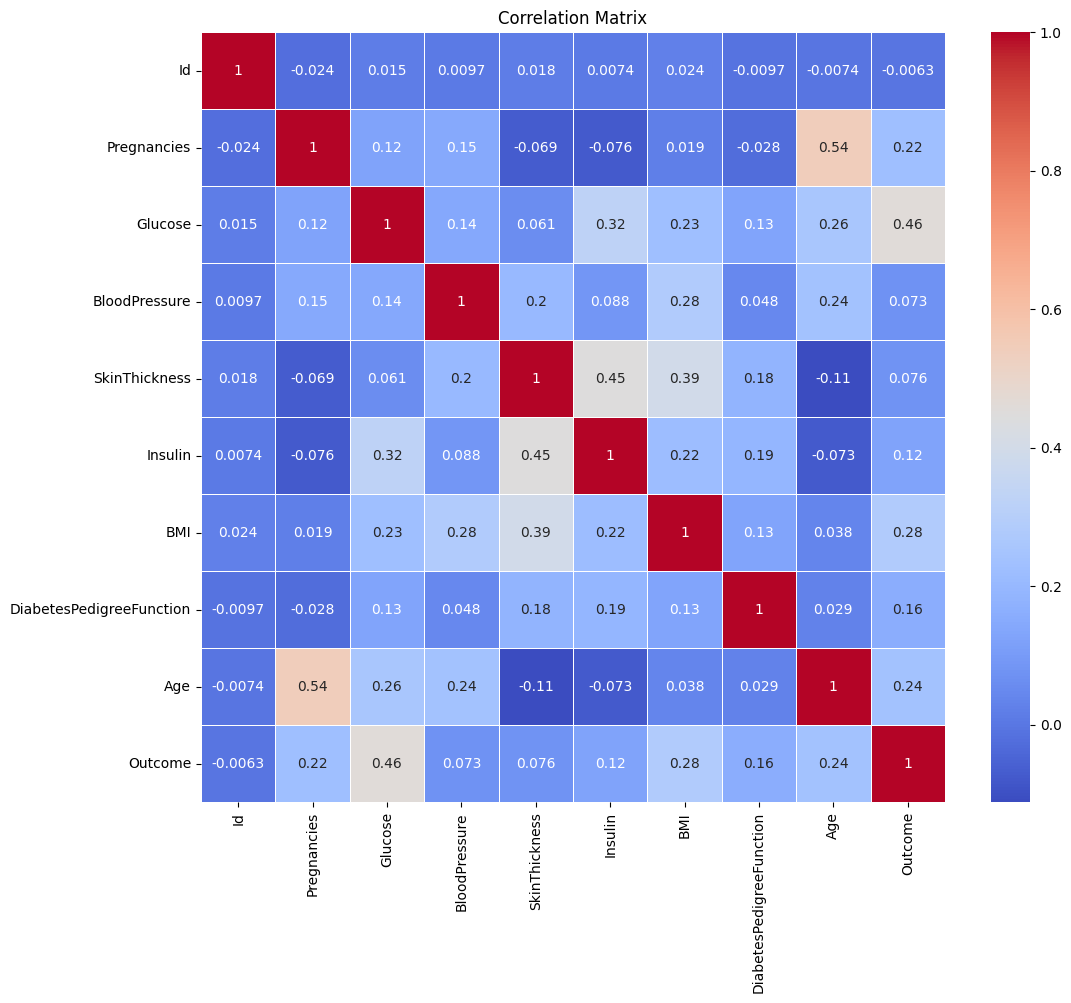

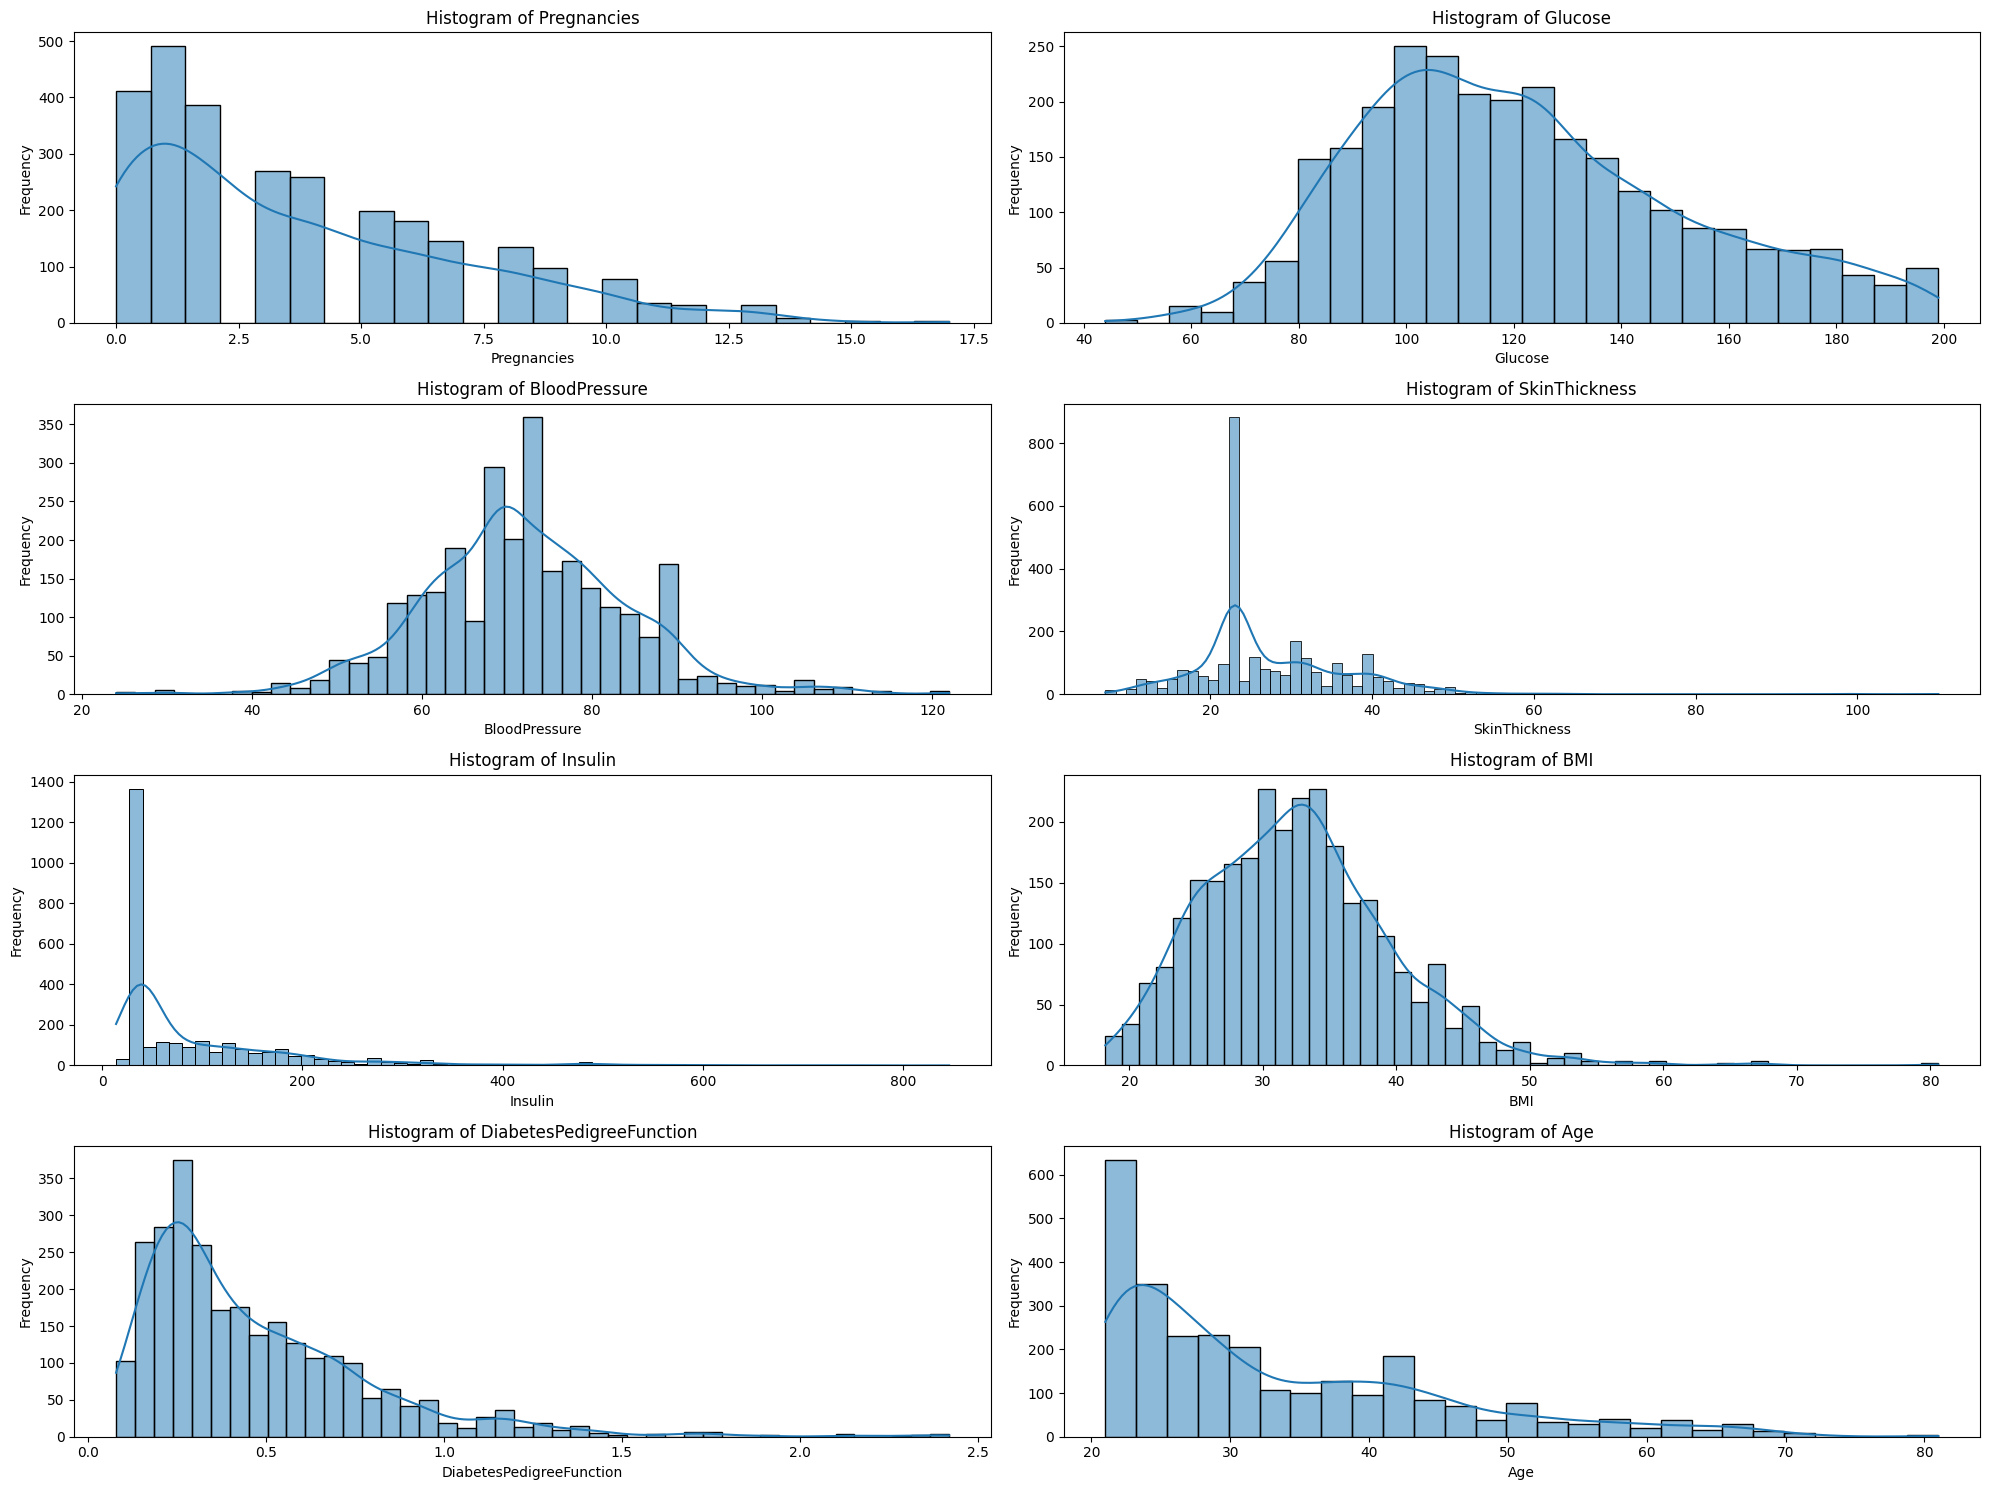

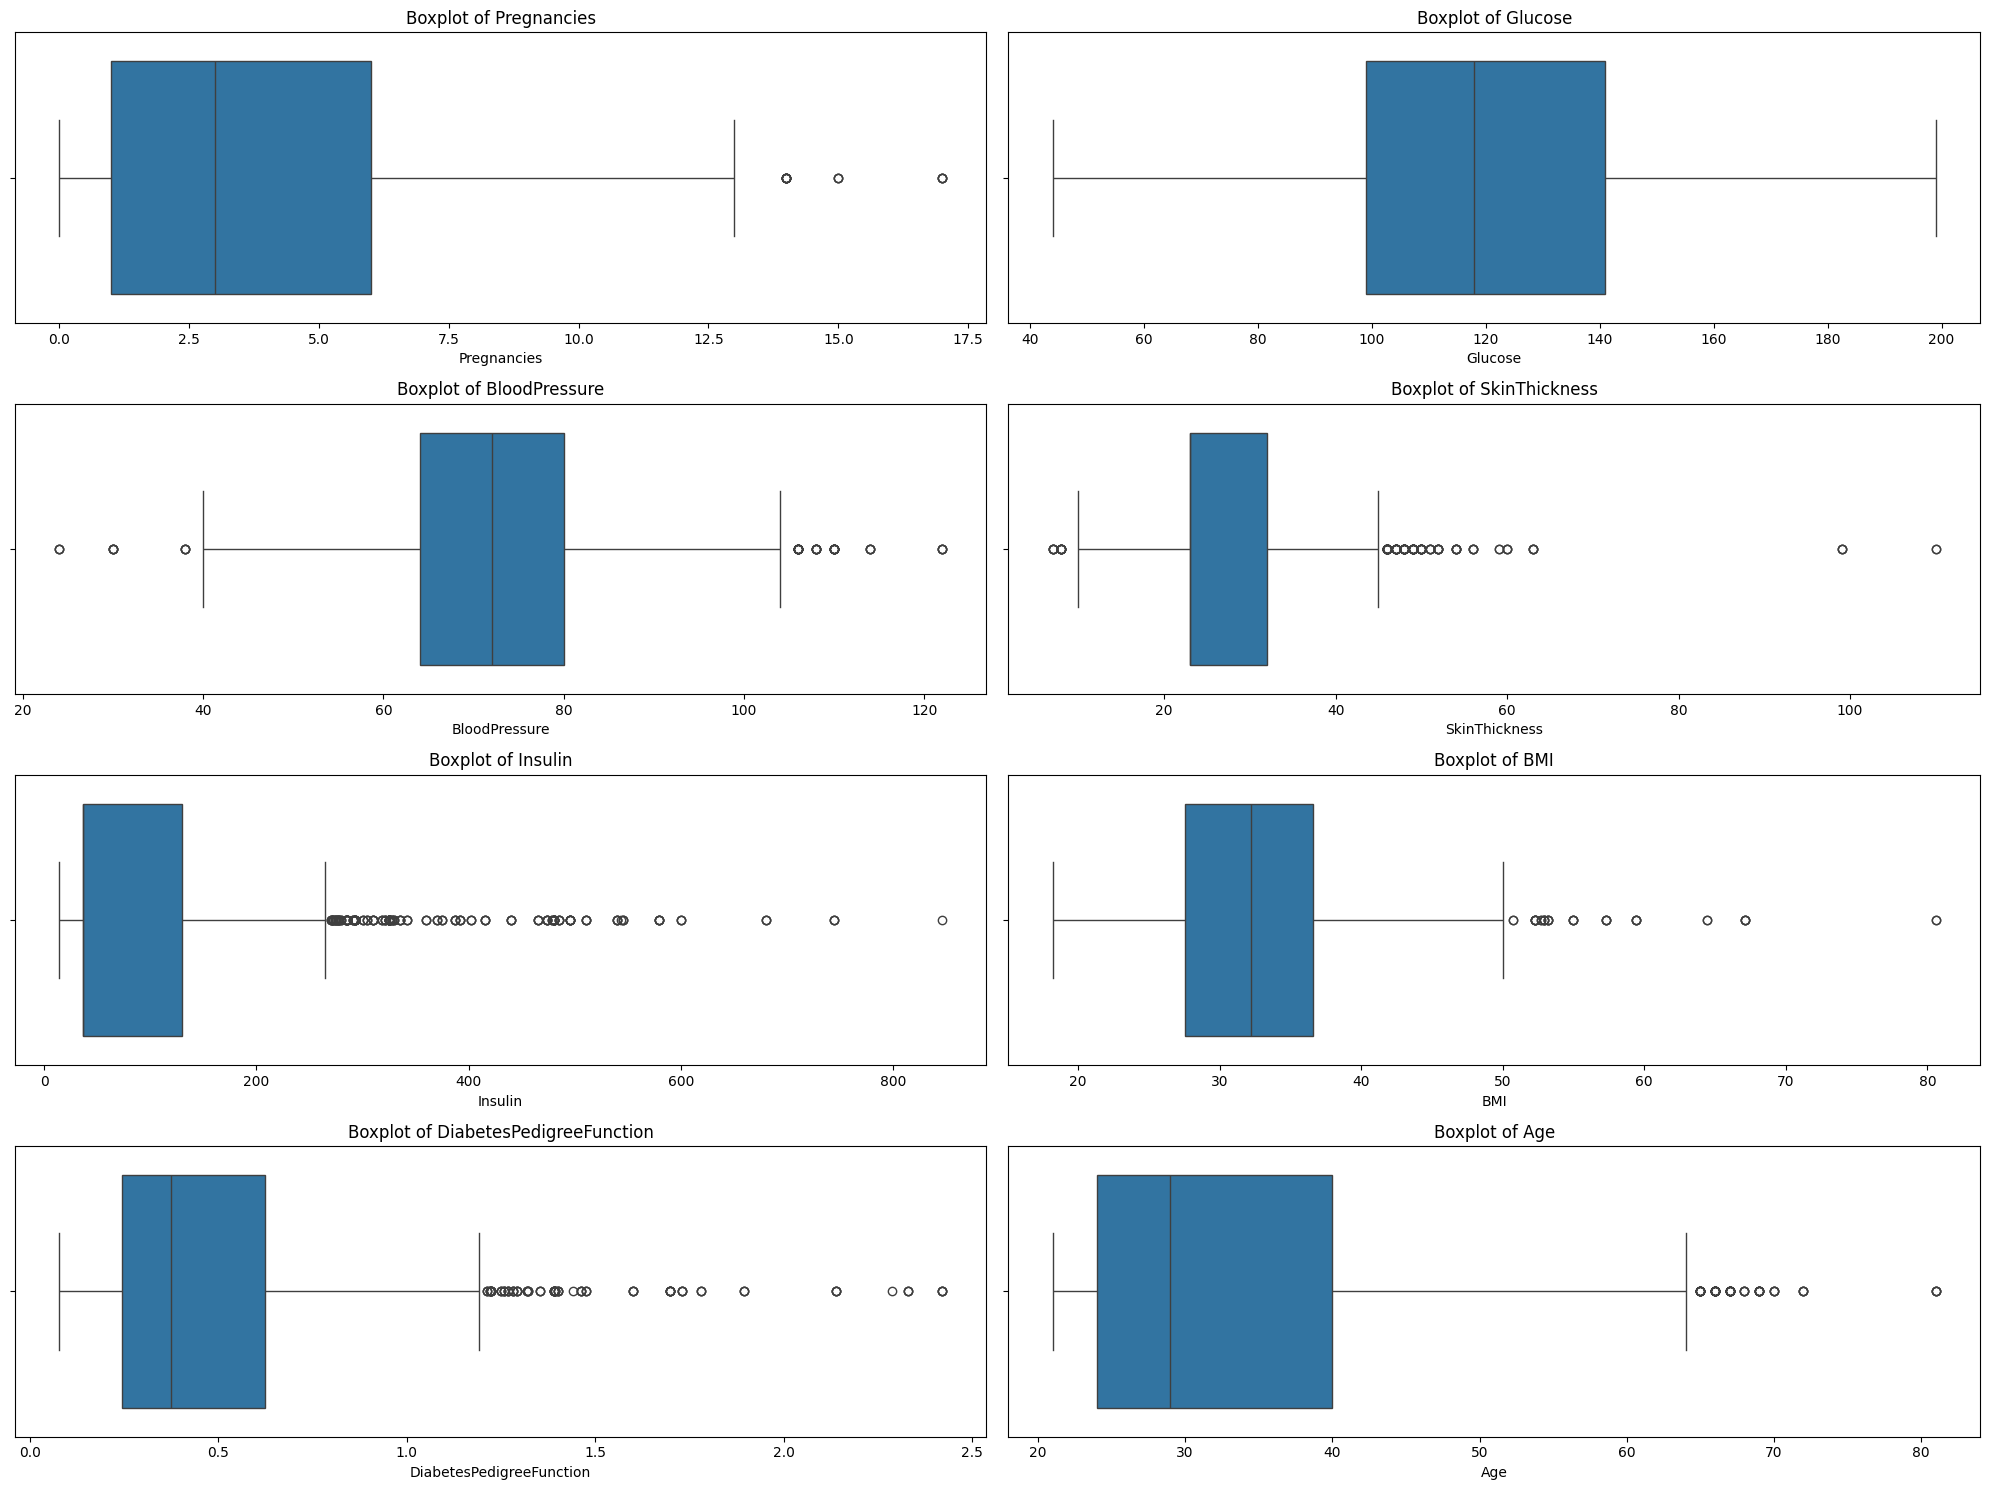

Count of 0 values in each column:
Id                             0
Pregnancies                  412
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64


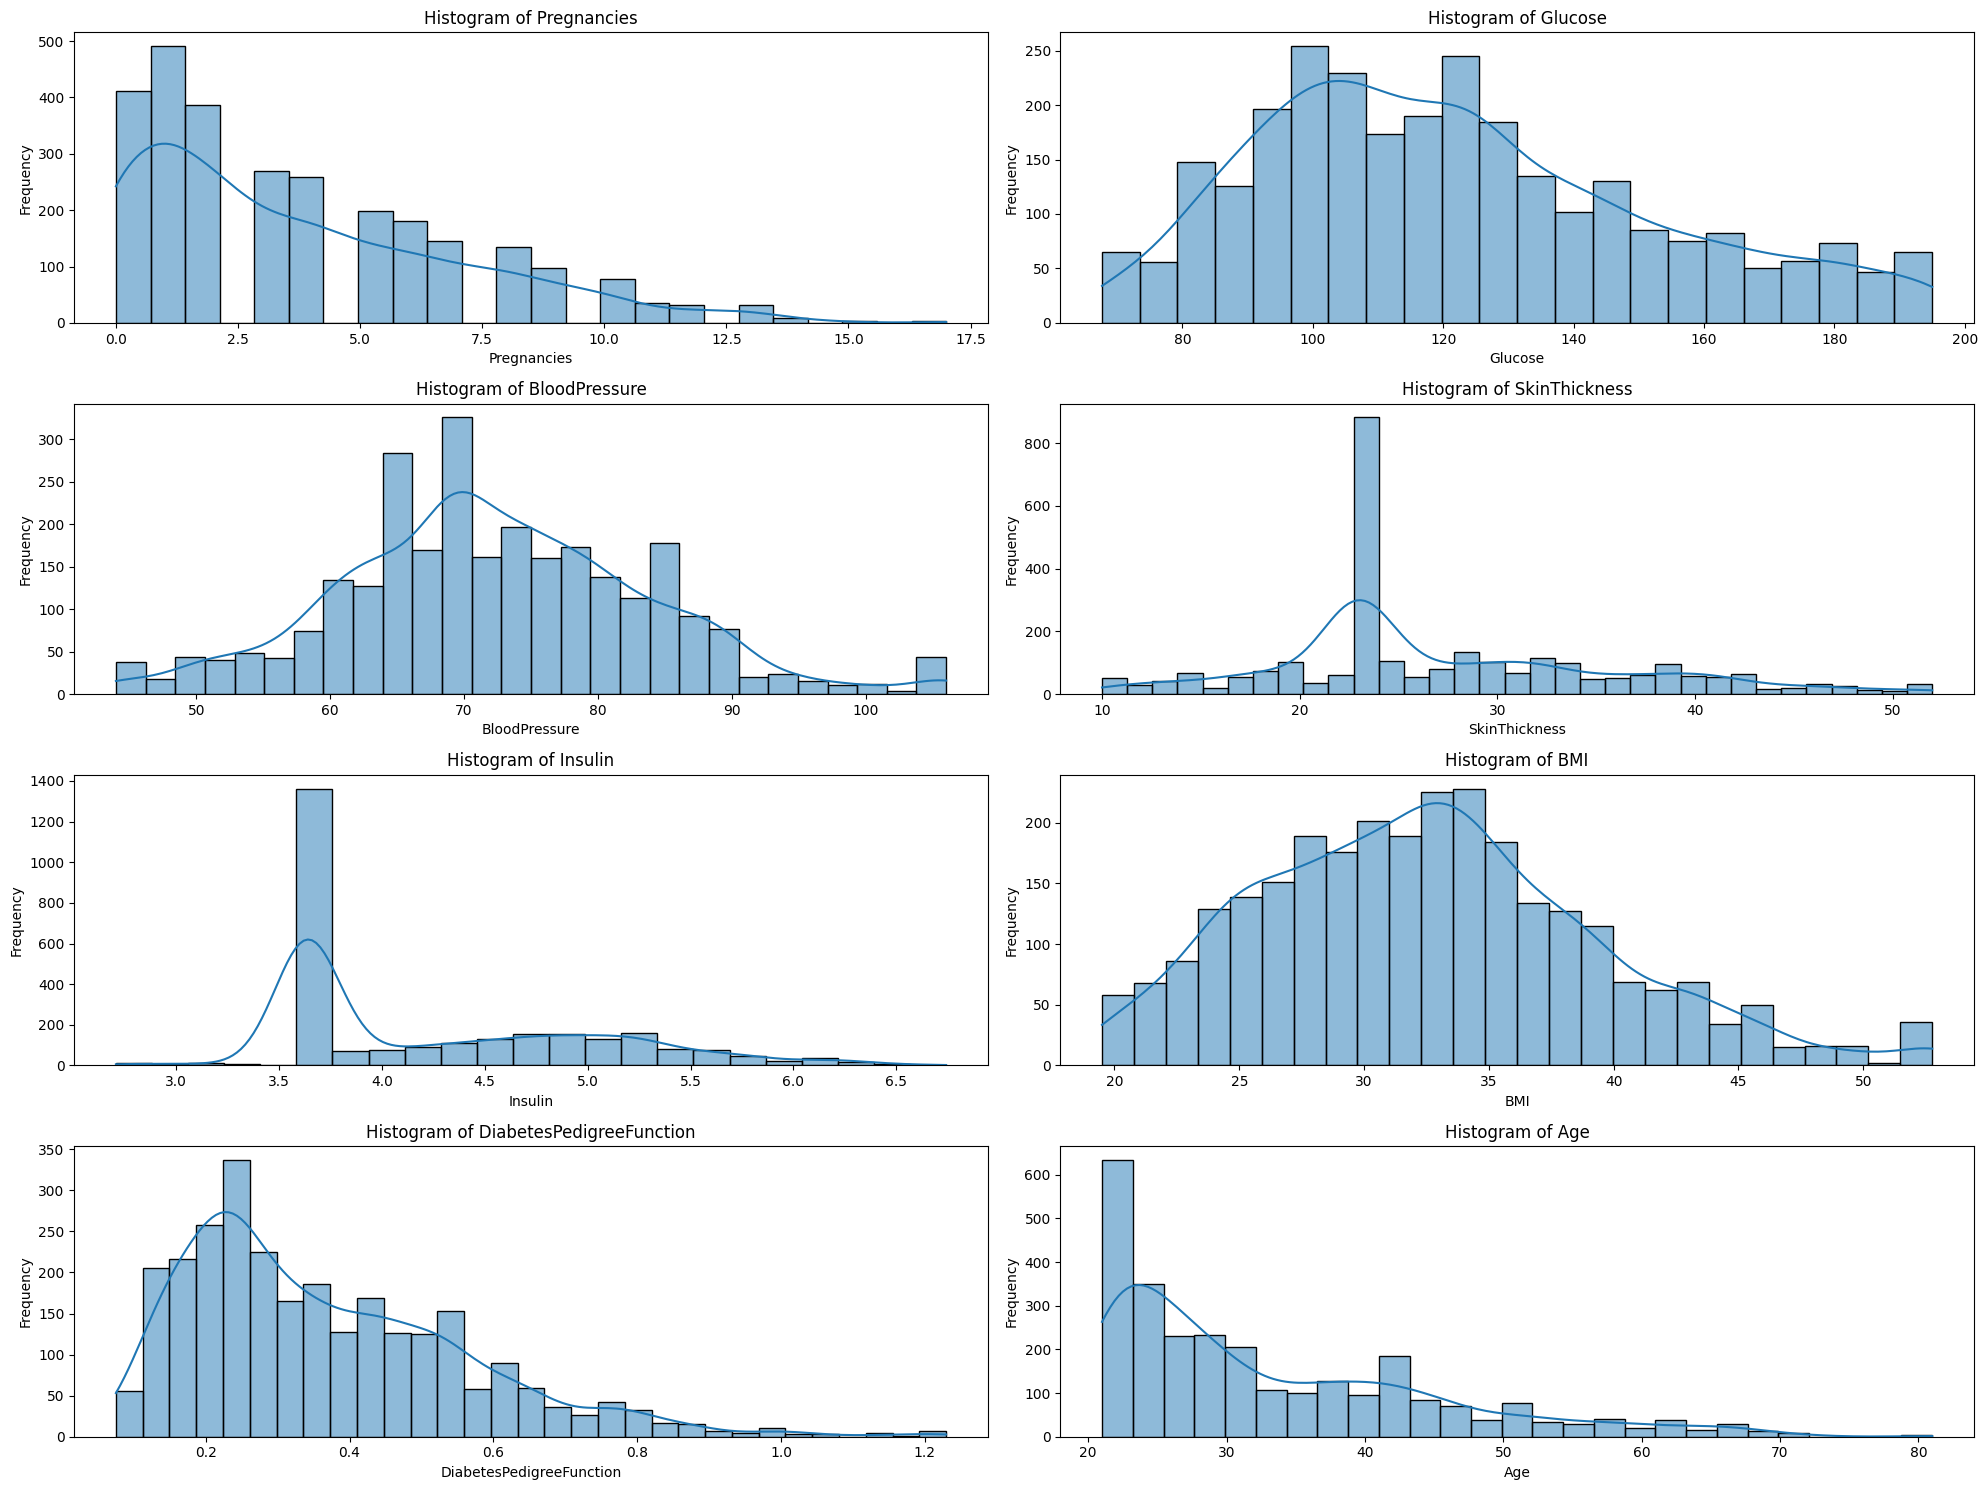

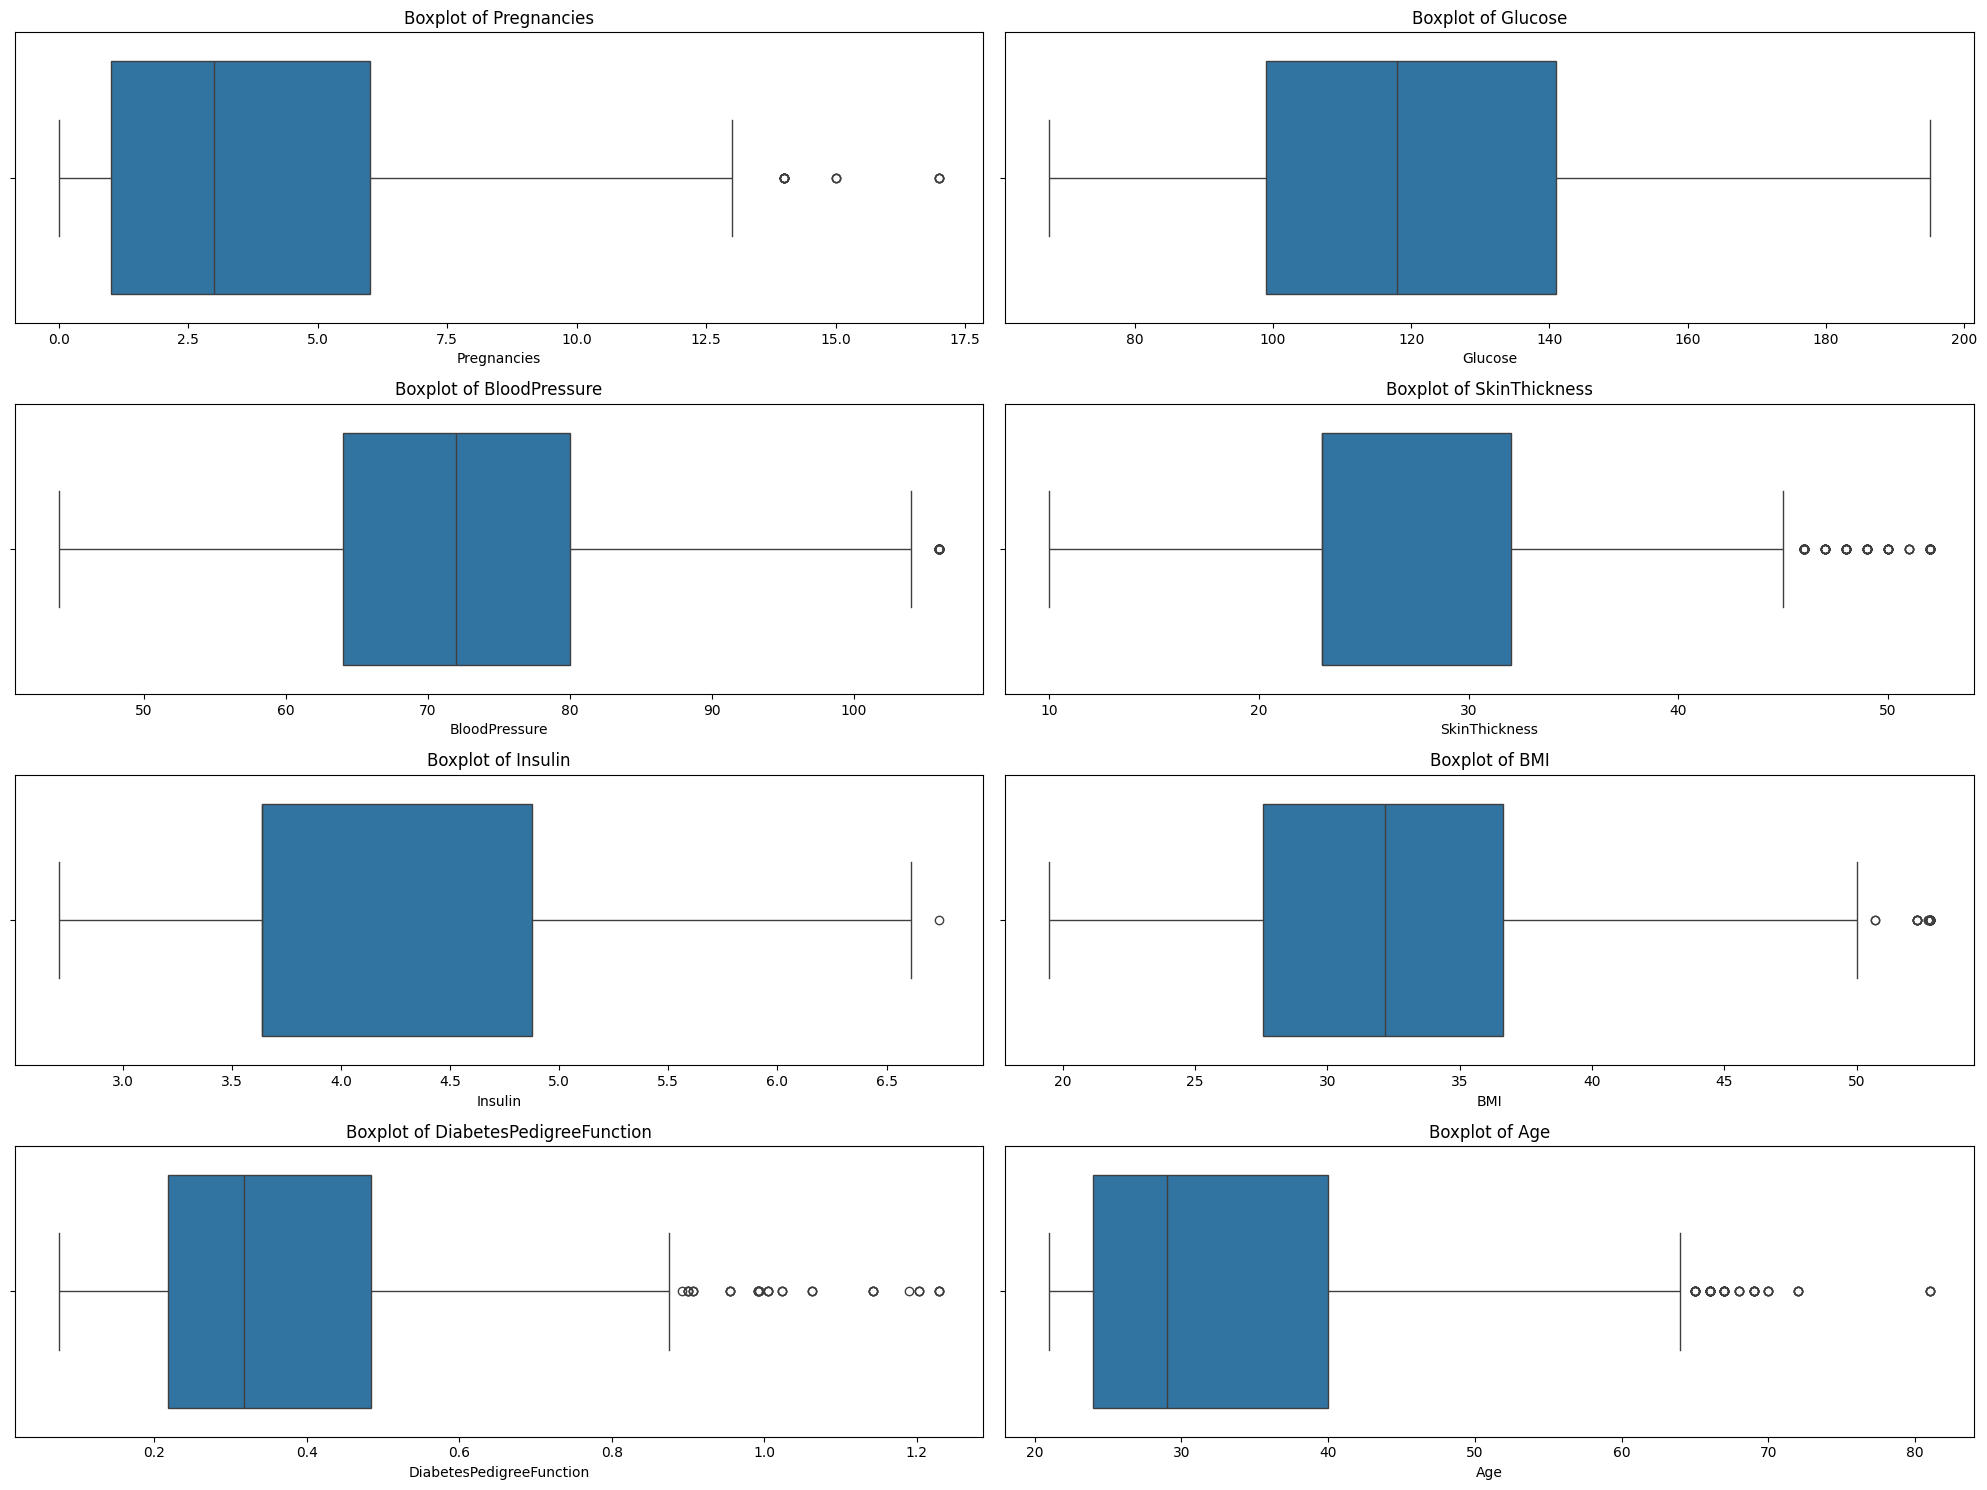

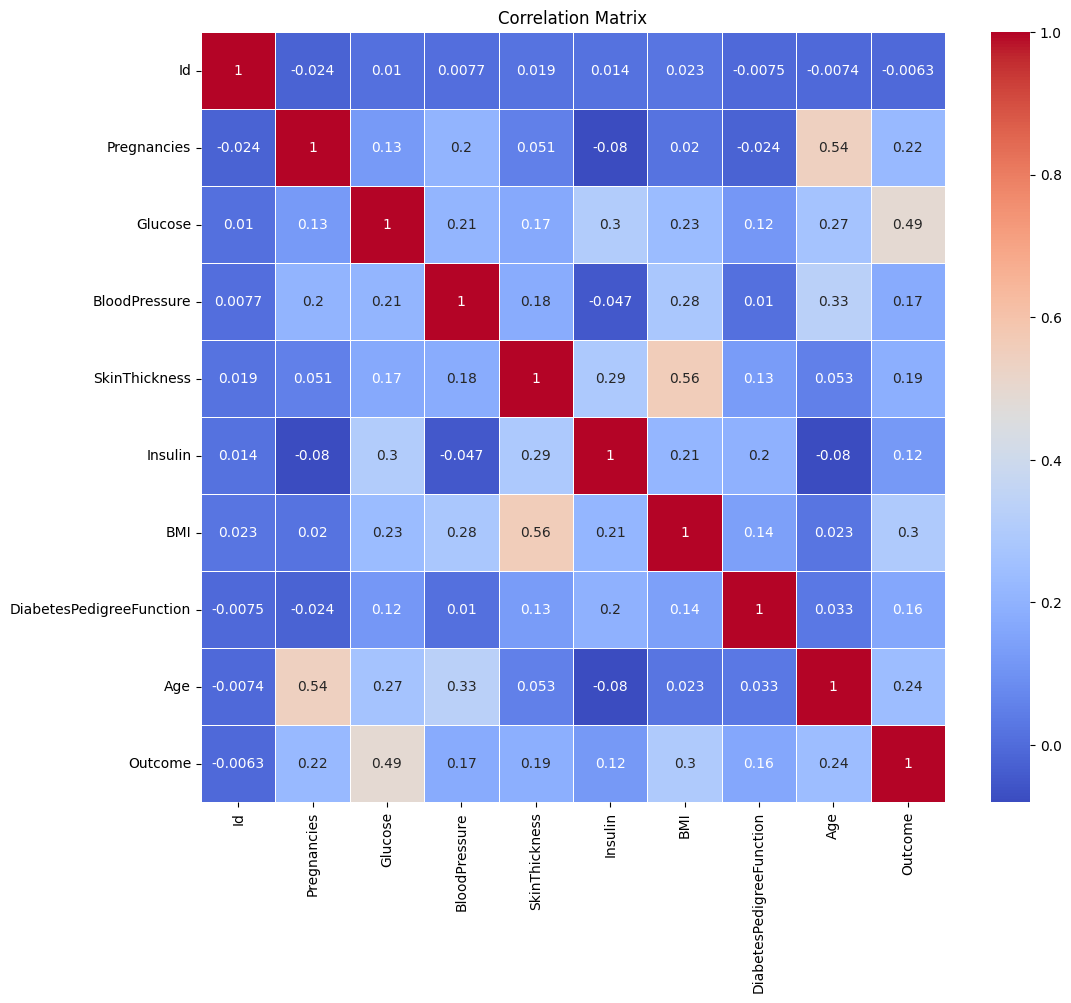

In [14]:
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def plot_histograms(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_boxplots(data, columns):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

# Plot histograms and boxplots before any processing
plot_histograms(data, columns_to_plot)
plot_boxplots(data, columns_to_plot)

# Plot correlation matrix before any processing
plot_correlation_matrix(data)

## handling missing values
# Replacing 0 values in skewed data with median
skewed_columns = ['Insulin', 'DiabetesPedigreeFunction', 'SkinThickness']
for col in skewed_columns:
    data[col] = data[col].replace(0, data[col].median())

# Replacing 0 values in normally distributed data with mean
normal_columns = ['BloodPressure', 'Glucose', 'BMI']
for col in normal_columns:
    data[col] = data[col].replace(0, data[col].mean())

# Plot histograms and boxplots after handling missing values
plot_histograms(data, columns_to_plot)
plot_boxplots(data, columns_to_plot)

# Final check - pregnancies and outcome can be 0 but the others are handled
zero_values = (data == 0).sum()
print("Count of 0 values in each column:")
print(zero_values)

## handling outliers for each feature
# Glucose: Cap values at 1st and 99th percentiles (Winsorization)
data["Glucose"] = data["Glucose"].clip(data["Glucose"].quantile(0.01), data["Glucose"].quantile(0.99))

# Blood Pressure: Replace 0 values with the median and cap extreme outliers
data["BloodPressure"] = data["BloodPressure"].replace(0, data["BloodPressure"].median())
data["BloodPressure"] = data["BloodPressure"].clip(data["BloodPressure"].quantile(0.01), data["BloodPressure"].quantile(0.99))

# Skin Thickness: Cap extreme values at the 99th percentile
data["SkinThickness"] = data["SkinThickness"].clip(data["SkinThickness"].quantile(0.01), data["SkinThickness"].quantile(0.99))

# Insulin: Use log transformation to reduce skewness
data["Insulin"] = np.log1p(data["Insulin"])

# BMI: Winsorization to cap extreme values
data["BMI"] = data["BMI"].clip(data["BMI"].quantile(0.01), data["BMI"].quantile(0.99))

# Diabetes Pedigree Function (DPF): Log transform to reduce the impact of large values
data["DiabetesPedigreeFunction"] = np.log1p(data["DiabetesPedigreeFunction"])

# Plot histograms and boxplots after handling outliers
plot_histograms(data, columns_to_plot)
plot_boxplots(data, columns_to_plot)

# Plot correlation matrix after handling missing values and outliers
plot_correlation_matrix(data)


VI. Splitting data into train and test sets
saves to same folder that the initial dataset is in

In [15]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Define the path where you want to save the train and test sets
# Make sure to replace 'SharedData' with the actual folder name where your dataset is
data_folder = '/content/drive/MyDrive/SharedData/'  # Update with your actual folder path

# Split the data into train and test sets
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the train and test sets to CSV files in Google Drive
X_train.to_csv(data_folder + 'X_train.csv', index=False)
X_test.to_csv(data_folder + 'X_test.csv', index=False)
y_train.to_csv(data_folder + 'y_train.csv', index=False)
y_test.to_csv(data_folder + 'y_test.csv', index=False)

print("Train and Test sets have been saved to Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train and Test sets have been saved to Google Drive.




---



# Model Building and Evaluation

I. Import Libraries

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

II. Load the Train and Test Sets
again loading data from the same directory shared at the start

In [17]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Define the path where the train and test sets are saved
data_folder = '/content/drive/MyDrive/SharedData/'  # Update this to your folder path

# Load the train and test sets from Google Drive
X_train = pd.read_csv(data_folder + 'X_train.csv')
X_test = pd.read_csv(data_folder + 'X_test.csv')
y_train = pd.read_csv(data_folder + 'y_train.csv')
y_test = pd.read_csv(data_folder + 'y_test.csv')

# Convert y_train and y_test to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("Data has been successfully loaded.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been successfully loaded.


III. Baseline models (Logistic Regression and Descision Tree) with evaluation of performance

In [18]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc

# Baseline model: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_results = evaluate_model(log_reg, X_train, y_train, X_test, y_test)

# Baseline model: Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_results = evaluate_model(decision_tree, X_train, y_train, X_test, y_test)

# Print results
print("Logistic Regression Results:")
print(f"Accuracy: {log_reg_results[0]:.4f}")
print(f"Precision: {log_reg_results[1]:.4f}")
print(f"Recall: {log_reg_results[2]:.4f}")
print(f"F1 Score: {log_reg_results[3]:.4f}")
print(f"ROC-AUC: {log_reg_results[4]:.4f}")

print("\nDecision Tree Results:")
print(f"Accuracy: {decision_tree_results[0]:.4f}")
print(f"Precision: {decision_tree_results[1]:.4f}")
print(f"Recall: {decision_tree_results[2]:.4f}")
print(f"F1 Score: {decision_tree_results[3]:.4f}")
print(f"ROC-AUC: {decision_tree_results[4]:.4f}")

Logistic Regression Results:
Accuracy: 0.7798
Precision: 0.7338
Recall: 0.5455
F1 Score: 0.6258
ROC-AUC: 0.7223

Decision Tree Results:
Accuracy: 0.9765
Precision: 0.9677
Recall: 0.9626
F1 Score: 0.9651
ROC-AUC: 0.9731


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


IV. Cross Validation for models

In [19]:
# Cross-validation for Logistic Regression
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Accuracy Scores:", log_reg_cv_scores)
print("Mean Cross-Validation Accuracy:", log_reg_cv_scores.mean())

# Cross-validation for Decision Tree
decision_tree_cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Accuracy Scores:", decision_tree_cv_scores)
print("Mean Cross-Validation Accuracy:", decision_tree_cv_scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression Cross-Validation Accuracy Scores: [0.79232506 0.81038375 0.74266366 0.75395034 0.75339367]
Mean Cross-Validation Accuracy: 0.7705432928510874

Decision Tree Cross-Validation Accuracy Scores: [0.9503386  0.97291196 0.98194131 0.96839729 0.96153846]
Mean Cross-Validation Accuracy: 0.967025525264803


V. Hyperparamter Tuning for Decision Tree - and evaluate best Descision Tree Model

In [20]:
# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters for Decision Tree:", grid_search.best_params_)
best_decision_tree = grid_search.best_estimator_

# Evaluate the best Decision Tree model
best_decision_tree_results = evaluate_model(best_decision_tree, X_train, y_train, X_test, y_test)

print("\nBest Decision Tree Results:")
print(f"Accuracy: {best_decision_tree_results[0]:.4f}")
print(f"Precision: {best_decision_tree_results[1]:.4f}")
print(f"Recall: {best_decision_tree_results[2]:.4f}")
print(f"F1 Score: {best_decision_tree_results[3]:.4f}")
print(f"ROC-AUC: {best_decision_tree_results[4]:.4f}")



Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Decision Tree Results:
Accuracy: 0.9477
Precision: 0.9247
Recall: 0.9198
F1 Score: 0.9223
ROC-AUC: 0.9408


VI. Feature Importance Plots


Feature Importances for Logistic Regression:
                          importance
DiabetesPedigreeFunction    1.325876
Pregnancies                 0.129974
BMI                         0.091180
Glucose                     0.038317
Age                         0.007426
SkinThickness               0.005695
Id                         -0.000044
BloodPressure              -0.010408
Insulin                    -0.246078


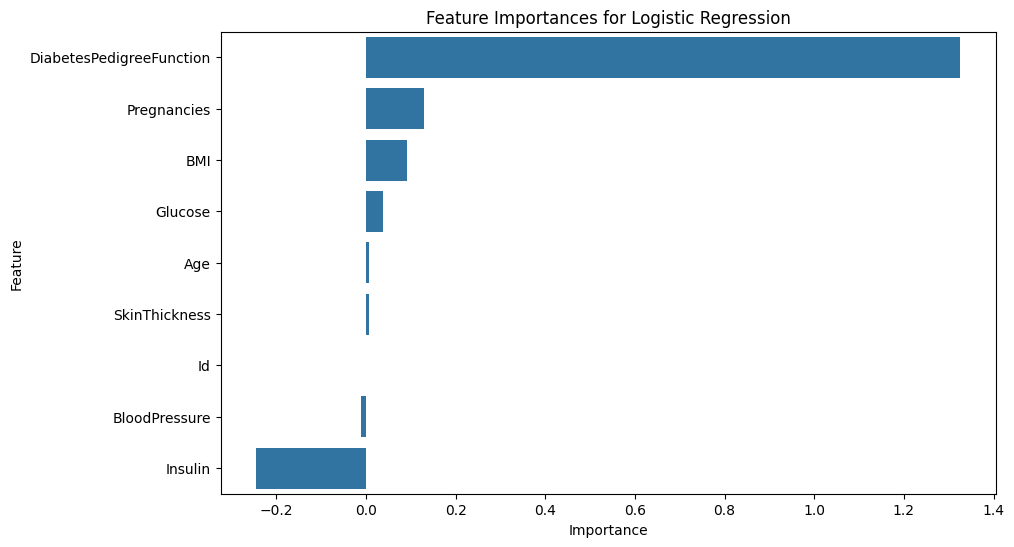


Feature Importances for Decision Tree:
                          importance
Glucose                     0.288046
BMI                         0.232268
Age                         0.127416
DiabetesPedigreeFunction    0.085412
Pregnancies                 0.083886
BloodPressure               0.076854
Insulin                     0.053042
SkinThickness               0.044520
Id                          0.008556


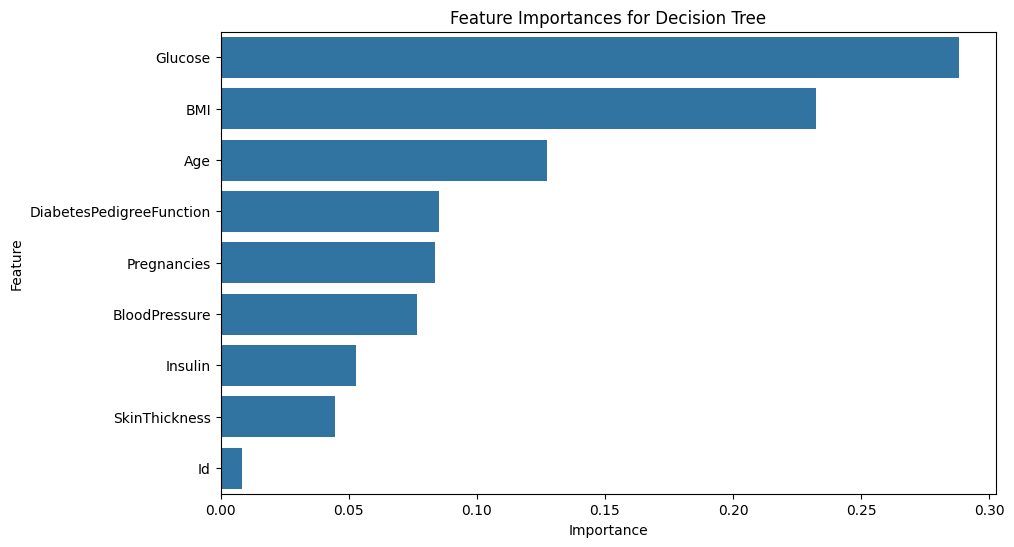

In [21]:
# Feature importance for Logistic Regression
log_reg_coefficients = pd.DataFrame(log_reg.coef_.flatten(),
                                    index=X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

print("\nFeature Importances for Logistic Regression:")
print(log_reg_coefficients)

# Plot feature importances for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=log_reg_coefficients.importance, y=log_reg_coefficients.index)
plt.title('Feature Importances for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Feature importance for Decision Tree
feature_importances = pd.DataFrame(best_decision_tree.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("\nFeature Importances for Decision Tree:")
print(feature_importances)

# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

VII. Correlation Matrix and Report for models

In [22]:
# Generate predictions for Logistic Regression
log_reg_y_pred = log_reg.predict(X_test)
print("\nConfusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, log_reg_y_pred))
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, log_reg_y_pred))

# Generate predictions for Decision Tree
decision_tree_y_pred = decision_tree.predict(X_test)
print("\nConfusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, decision_tree_y_pred))
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, decision_tree_y_pred))

# For the best Decision Tree model after hyperparameter tuning
best_decision_tree_y_pred = best_decision_tree.predict(X_test)
print("\nConfusion Matrix for Best Decision Tree:")
print(confusion_matrix(y_test, best_decision_tree_y_pred))
print("\nClassification Report for Best Decision Tree:")
print(classification_report(y_test, best_decision_tree_y_pred))


Confusion Matrix for Logistic Regression:
[[330  37]
 [ 85 102]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       367
           1       0.73      0.55      0.63       187

    accuracy                           0.78       554
   macro avg       0.76      0.72      0.73       554
weighted avg       0.77      0.78      0.77       554


Confusion Matrix for Decision Tree:
[[361   6]
 [  7 180]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       367
           1       0.97      0.96      0.97       187

    accuracy                           0.98       554
   macro avg       0.97      0.97      0.97       554
weighted avg       0.98      0.98      0.98       554


Confusion Matrix for Best Decision Tree:
[[353  14]
 [ 15 172]]

Classification Report for Best Decision Tree:
              prec